In [88]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import testCases
from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward
import lr_utils
import scipy
from scipy import ndimage
%matplotlib inline
np.random.seed(1)

In [46]:
#初始化参数

def initialize_parameters(n_x, n_h, n_y):
    """
    """
    # 随机初始化
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters  

In [47]:
#测试初始化参数
print("==============测试initialize_parameters==============")
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

==============测试initialize_parameters==============
W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[ 0.]]


In [48]:
#初始化L层的神经网络
def initialize_parameters_deep(layers_dims):
    """
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        #2层以上可用 np.sqrt(layers_dims[l -1]，以下用0.01即可，目的都是使其变小
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) / np.sqrt(layers_dims[l -1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
        assert(parameters["W" + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l], 1))

    return parameters

In [49]:
#测试initialize_parameters_deep
print("==============测试initialize_parameters_deep==============")
layers_dims = [5,4,3]
parameters = initialize_parameters_deep(layers_dims)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

==============测试initialize_parameters_deep==============
W1 = [[ 0.79989897  0.19521314  0.04315498 -0.83337927 -0.12405178]
 [-0.15865304 -0.03700312 -0.28040323 -0.01959608 -0.21341839]
 [-0.58757818  0.39561516  0.39413741  0.76454432  0.02237573]
 [-0.18097724 -0.24389238 -0.69160568  0.43932807 -0.49241241]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.59252326 -0.10282495  0.74307418  0.11835813]
 [-0.51189257 -0.3564966   0.31262248 -0.08025668]
 [-0.38441818 -0.11501536  0.37252813  0.98805539]]
b2 = [[ 0.]
 [ 0.]
 [ 0.]]


In [50]:
#向前传播中的线性部分：
def linear_forward(A, W, b):
    """
    """
    Z = np.dot(W, A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [51]:
#测试linear_forward
print("==============测试linear_forward==============")
A,W,b = testCases.linear_forward_test_case()
Z,linear_cache = linear_forward(A,W,b)
print("Z = " + str(Z))

==============测试linear_forward==============
Z = [[ 3.26295337 -1.23429987]]


In [52]:
#线性激活部分
def linear_activation_forward(A_prev,W,b,activation):
    """
    """
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert(A.shape == (W.shape[0],A_prev.shape[1]))
    cache = (linear_cache,activation_cache)

    return A,cache

In [53]:
#测试linear_activation_forward
print("==============测试linear_activation_forward==============")
A_prev, W,b = testCases.linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("sigmoid，A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("ReLU，A = " + str(A))

==============测试linear_activation_forward==============
sigmoid，A = [[ 0.96890023  0.11013289]]
ReLU，A = [[ 3.43896131  0.        ]]


In [54]:
#多层模型的前向传播过程
def L_model_forward(X, parameters):
    """
    """
    caches = []
    A = X # X
    L = len(parameters) // 2 # relu激活层层数+1
    #前L-1层为relu函数
    for l in range(1, L):
        A_prev = A  # 更新每一层的A值
        A, cache = linear_activation_forward(A_prev, parameters['W'+ str(l)], parameters['b' + str(L)], 'relu')
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A,  parameters['W'+ str(L)], parameters['b' + str(L)], 'sigmoid')
    caches.append(cache)
        
    assert(AL.shape == (1, X.shape[1]))
        
    return AL,caches

In [55]:
#测试L_model_forward
print("==============测试L_model_forward==============")
X,parameters = testCases.L_model_forward_test_case()
AL,caches = L_model_forward(X,parameters)
print("AL = " + str(AL))
print("caches 的长度为 = " + str(len(caches)))

==============测试L_model_forward==============
AL = [[ 0.29221587  0.40486306]]
caches 的长度为 = 2


In [56]:
#计算成本
def compute_cost(AL, Y):
    """
    """
    m = Y.shape[1]
    cost = - np.sum(np.multiply(np.log(AL), Y) + np.multiply(np.log(1 - AL), 1 - Y)) / m
    
    cost = np.squeeze(cost) # 转换为数，类型仍是ndarray
    assert(cost.shape == ())
    
    return cost

In [57]:
#测试compute_cost
print("==============测试compute_cost==============")
Y,AL = testCases.compute_cost_test_case()
print("cost = " + str(compute_cost(AL, Y)))

==============测试compute_cost==============
cost = 0.414931599615


In [77]:
#反向传播线性部分
def linear_backward(dZ, cache):
    """
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis = 1, keepdims = True) / m
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    #assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [59]:
#测试linear_backward
print("==============测试linear_backward==============")
dZ, linear_cache = testCases.linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

==============测试linear_backward==============
dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[ 0.50629448]]


In [60]:
#反向传播线性激活部分
def linear_activation_backward(dA, cache, activation = 'relu'):
    """
    """
    linear_cache, activation_cache = cache
    if activation == 'relu':
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

In [61]:
#测试linear_activation_backward
print("==============测试linear_activation_backward==============")
AL, linear_activation_cache = testCases.linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

==============测试linear_activation_backward==============
sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [62]:
#多层模型的反向传播
def L_model_backward(AL, Y, caches):
    """
    """
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L -1]
    grads['dA' + str(L)], grads['dW' + str(L)], grads['db' + str(L)] = linear_activation_backward(dAL, current_cache, 'sigmoid')
    
    for l in reversed(range(L - 1)):#注意反向 reverse
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA' + str(l + 2)], current_cache, 'relu')
        grads['dA' + str(l + 1)] = dA_prev_temp
        grads['dW' + str(l + 1)] = dW_temp
        grads['db' + str(l + 1)] = db_temp
        
    return grads

In [63]:
#测试L_model_backward
print("==============测试L_model_backward==============")
AL, Y_assess, caches = testCases.L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

==============测试L_model_backward==============
dW1 = [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]


In [64]:
# 更新学习率

def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2#整除2，直接保留整数？？？？？？？？？？？？？？？？？
    for l in range(L):
        parameters['W' + str(l + 1)] = parameters['W' + str(l + 1)] - learning_rate * grads['dW' + str(l + 1)]
        parameters['b' + str(l + 1)] = parameters['b' + str(l + 1)] - learning_rate * grads['db' + str(l + 1)]
    #迭代 L 次？？？？？？？？？？？？？？？？？？？？？？
    
    return parameters

In [65]:
#测试update_parameters
print("==============测试update_parameters==============")
parameters, grads = testCases.update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

==============测试update_parameters==============
W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [66]:
#搭建两层神经网络
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False, isPlot = True):
    """
    """
    np.random.seed(1)
    grads = {}
    costs = []
    (n_x, n_h, n_y) = layers_dims
    
    #初始化参数
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #开始迭代
    for i in range(0, num_iterations):
        #向前传播
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        #计算成本
        cost = compute_cost(A2, Y)
        
        #向后传播
        #初始化
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        #向后传播，输入：“dA2，cache2，cache1”。 输出：“dA1，dW2，db2;还有dA0（未使用），dW1，db1”
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        #向后传播完成后的数据保存
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2
        
        #更新参数
        parameters = update_parameters(parameters,grads,learning_rate)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        #打印成本值
        if i % 100 == 0:
            #记录成本
            costs.append(cost)
            #是否打印成本值
            if print_cost:
                print('第', i , '次迭代，成本值为：', np.squeeze(cost))
    
    #迭代完成，绘图
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations(per tens)')
        plt.title('learning rate = ' + str(learning_rate))
        plt.show()
        
    return parameters

In [67]:
train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = lr_utils.load_dataset()

train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255
train_y = train_set_y
test_x = test_x_flatten / 255
test_y = test_set_y

第 0 次迭代，成本值为： 0.69304973566
第 100 次迭代，成本值为： 0.646432095343
第 200 次迭代，成本值为： 0.632514064791
第 300 次迭代，成本值为： 0.601502492035
第 400 次迭代，成本值为： 0.560196631161
第 500 次迭代，成本值为： 0.515830477276
第 600 次迭代，成本值为： 0.475490131394
第 700 次迭代，成本值为： 0.433916315123
第 800 次迭代，成本值为： 0.40079775362
第 900 次迭代，成本值为： 0.358070501132
第 1000 次迭代，成本值为： 0.339428153837
第 1100 次迭代，成本值为： 0.30527536362
第 1200 次迭代，成本值为： 0.274913772821
第 1300 次迭代，成本值为： 0.246817682106
第 1400 次迭代，成本值为： 0.198507350375
第 1500 次迭代，成本值为： 0.174483181126
第 1600 次迭代，成本值为： 0.170807629781
第 1700 次迭代，成本值为： 0.113065245622
第 1800 次迭代，成本值为： 0.0962942684594
第 1900 次迭代，成本值为： 0.0834261795973
第 2000 次迭代，成本值为： 0.0743907870432
第 2100 次迭代，成本值为： 0.0663074813227
第 2200 次迭代，成本值为： 0.0591932950104
第 2300 次迭代，成本值为： 0.0533614034856
第 2400 次迭代，成本值为： 0.0485547856288


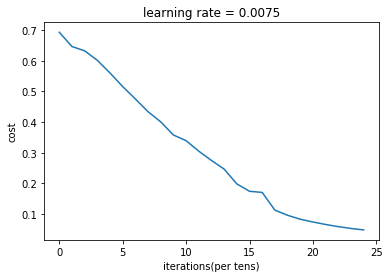

In [68]:
n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x,n_h,n_y)

parameters = two_layer_model(train_x, train_set_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True,isPlot=True)

In [69]:
def predict(X, y, parameters):
    
    m = X.shape[1]
    n = len(parameters) // 2#网络的层数
    p = np.zeros((1, m))
    
    #根据参数向前传播
    probas, caches = L_model_forward(X, parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
            
    print('准确度为：' + str(float(np.sum((p == y)) / m)))
    
    return p

In [70]:
predictions_train = predict(train_x, train_y, parameters)
predictions_test = predict(test_x, test_y, parameters)

准确度为：1.0
准确度为：0.72


In [74]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False, isPlot = True):
    """
    """
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads,learning_rate)
        
        #打印成本值
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print("第", i, "次迭代，成本值为：", np.squeeze(cost))
                
    #绘图
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations(per tens)')
        plt.title('Learning rate = ' + str(learning_rate))
        plt.show()
        
    return parameters

In [75]:
train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = lr_utils.load_dataset()

train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255
train_y = train_set_y
test_x = test_x_flatten / 255
test_y = test_set_y

第 0 次迭代，成本值为： 0.715731513414
第 100 次迭代，成本值为： 0.675396962682
第 200 次迭代，成本值为： 0.662228466696
第 300 次迭代，成本值为： 0.650298632973
第 400 次迭代，成本值为： 0.637303320896
第 500 次迭代，成本值为： 0.620362437475
第 600 次迭代，成本值为： 0.599037966057
第 700 次迭代，成本值为： 0.571942548708
第 800 次迭代，成本值为： 0.540427487839
第 900 次迭代，成本值为： 0.507153897797
第 1000 次迭代，成本值为： 0.456817350124
第 1100 次迭代，成本值为： 0.408421921409
第 1200 次迭代，成本值为： 0.341638405045
第 1300 次迭代，成本值为： 0.28945745051
第 1400 次迭代，成本值为： 0.232466043454
第 1500 次迭代，成本值为： 0.182928845052
第 1600 次迭代，成本值为： 0.142860489048
第 1700 次迭代，成本值为： 0.1186835853
第 1800 次迭代，成本值为： 0.101759712198
第 1900 次迭代，成本值为： 0.0910376336135
第 2000 次迭代，成本值为： 0.0834224639841
第 2100 次迭代，成本值为： 0.0786751235764
第 2200 次迭代，成本值为： 0.0744935829443
第 2300 次迭代，成本值为： 0.0714683603263
第 2400 次迭代，成本值为： 0.0688524101238


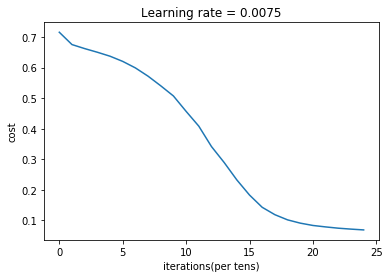

In [78]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True,isPlot=True)

In [79]:
prediction_train = predict(train_x, train_y, parameters)
prediction_test = predict(test_x, test_y, parameters)

准确度为：0.9760765550239234
准确度为：0.78


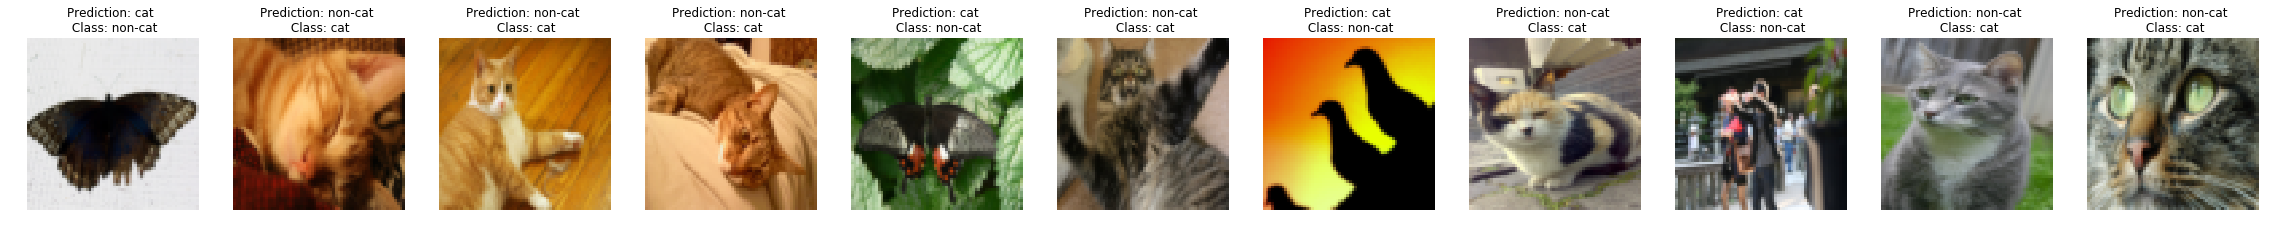

In [85]:
def print_mislabeled_images(classes, X, y, p):
    """
    绘制预测和实际不同的图像。
        X - 数据集
        y - 实际的标签
        p - 预测
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))#预测错误则和为 1
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # 设置默认尺寸
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]

        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


print_mislabeled_images(classes, test_x, test_y, prediction_test)

准确度为：1.0
y = 1.0, your L-layer model predicts a "cat" picture.


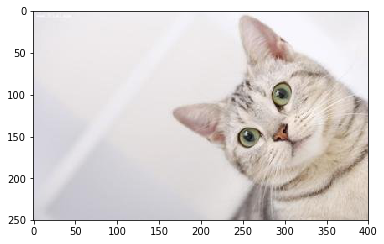

In [91]:
# 测试
my_image = "maomi_test.jpg" # 图像位置 
my_label_y = [1] # 图像真实标签
#fname = "images/" + my_image
fname = my_image
num_px = 64 #为什么还要自己设
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)
plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")